<a href="https://colab.research.google.com/github/teazaw/MAT421-Applied-Computational-Methods/blob/main/MAT421_HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Numerical Error and Instability**

**Numerical error** refers to the difference between the true solution of a mathematical problem and the solution we get from a numerical method.
There are three main sources of error:
1. Rounding errors
2. Uncertainty in the data
3. Truncation/discretization/approximation errors

**Numerical instability** occurs when small errors from round-off or truncation grow uncontrollably as the algorithm progresses.
Instability can occur when:
1. The step size is too large
2. The method isn't suitable for the equation

The example shows that the Euler method behaves differently with different step sizes when solving an equation. The green method stays close to the true solution while the red method demonstrates instability.

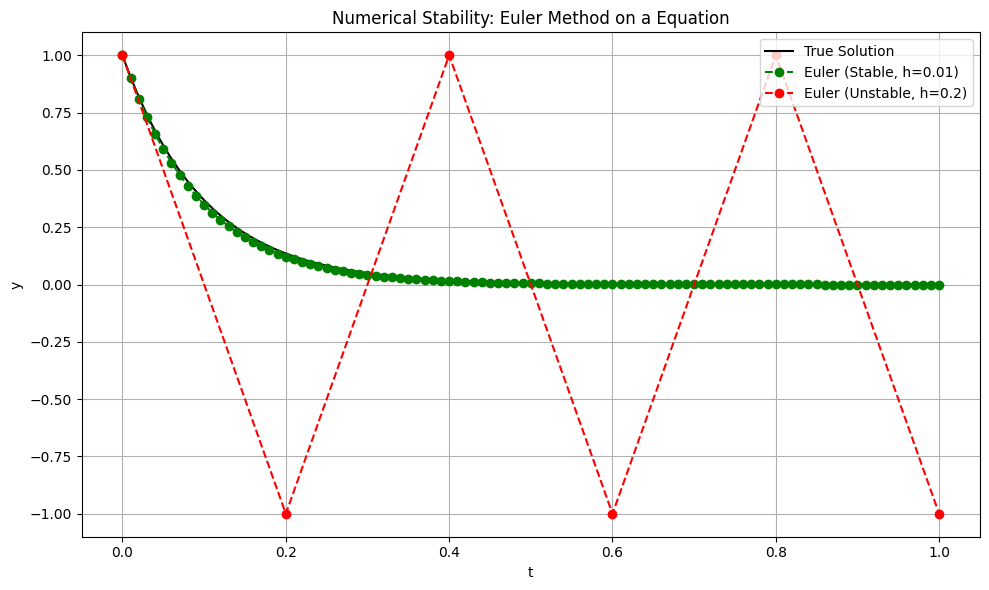

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# dy/dt = -10y
def f(t, y):
    return -10 * y

def euler_method(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] + h * f(t_values[i-1], y_values[i-1])

    return t_values, y_values

def true_solution(t):
    return np.exp(-10 * t)


t0 = 0
y0 = 1
t_end = 1

# different step sizes
h_small = 0.01
h_large = 0.2

t_small, y_small = euler_method(f, t0, y0, t_end, h_small)
t_large, y_large = euler_method(f, t0, y0, t_end, h_large)
t_true = np.linspace(t0, t_end, 200)
y_true = true_solution(t_true)
plt.figure(figsize=(10, 6))
plt.plot(t_true, y_true, 'k-', label='True Solution')
plt.plot(t_small, y_small, 'g--o', label='Euler (Stable, h=0.01)')
plt.plot(t_large, y_large, 'r--o', label='Euler (Unstable, h=0.2)')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Numerical Stability: Euler Method on a Equation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Predictor-Corrector Methods**

**Predictor-corrector methods** are used to solve initial value problems by improving the accuracy of simpler methods.

They involve two main steps:
1. A predictor, which uses an explicit method (like Euler’s) to estimate the solution at the next point
2. A corrector, which refines that estimate using a weighted average or an implicit formula.


By evaluating the function multiple times at different points, these methods produce a more accurate approximation of the solution.

The **midpoint method** has the predictor step:

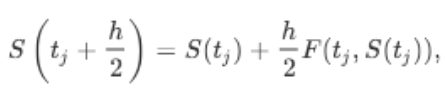

And the corrector step:

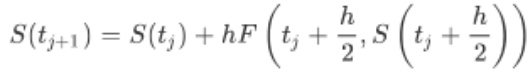

The following example shows the Midpoint Method.

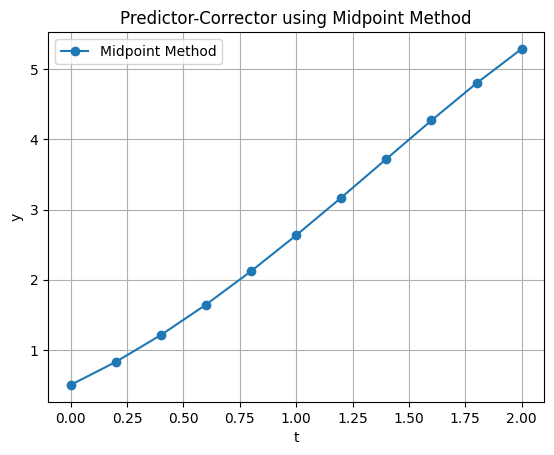

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# dy/dt = f(t, y)
def f(t, y):
    return y - t**2 + 1

# Midpoint Method
def midpoint_method(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t = t_values[i-1]
        y = y_values[i-1]

        # predictor
        k1 = f(t, y)
        y_mid = y + (h / 2) * k1
        t_mid = t + h / 2

        # corrector
        k2 = f(t_mid, y_mid)
        y_next = y + h * k2

        y_values[i] = y_next

    return t_values, y_values


t0 = 0
y0 = 0.5
t_end = 2
h = 0.2


t_vals, y_vals = midpoint_method(f, t0, y0, t_end, h)
plt.plot(t_vals, y_vals, 'o-', label="Midpoint Method")
plt.xlabel('t')
plt.ylabel('y')
plt.title("Predictor-Corrector using Midpoint Method")
plt.legend()
plt.grid(True)
plt.show()

